<h2>Guia geral para correção do notebook da Atividade Final de ECD - 2020</h2>

- Apresentamos algumas diretrizes para a correção do notebook.<br>
- É importante notar que o pdf com resultados resumidos e comentados não é o mesmo que uma versão em pdf deste notebook.<br>
- É esperado que no pdf haja uma discussão das escolhas e hipóteses que se assume ao adotar uma cada procedimento.<br>
- Por fim, este notebook não pretende esgotar todas as possibilidades de resolução, mas prover um exemplo de resposta às questões propostas. Espera-se que o pdf contenha predominantemente comentários, tabelas, gráficos de forma a fundamentar o que foi feito. E evite conter códigos, visto que os mesmos já estão presentes no notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
import itertools
from scipy.stats import f
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
dados = pd.read_csv("Brain.csv") #Leitura dos dados

In [3]:
dados.head() #Visualização da base

,Homem,Acima45,Tamanho,Peso
0,1,0,4512,1530
1,1,0,3738,1297
2,1,0,4261,1335
3,1,0,3777,1282
4,1,0,4177,1590


Análise descritiva (Aula 1)

In [4]:
dados.describe().round(2) #Estatísticas gerais

,Homem,Acima45,Tamanho,Peso
count,237.00,237.00,237.00,237.00
mean,0.57,0.54,3633.99,1282.87
std,0.50,0.50,365.26,120.34
min,0.00,0.00,2720.00,955.00
25%,0.00,0.00,3389.00,1207.00
50%,1.00,1.00,3614.00,1280.00
75%,1.00,1.00,3876.00,1350.00
max,1.00,1.00,4747.00,1635.00


In [5]:
dados.shape # Dimensões do dataframe

(237, 4)

In [6]:
dados['Homem'].sum() / len(dados) #Proporção de homens (=1)

0.5654008438818565

<BarContainer object of 2 artists>

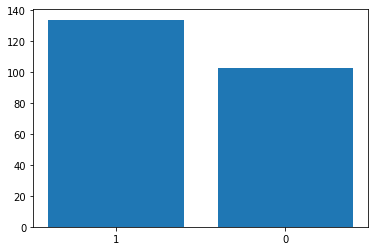

In [7]:
plt.bar(['1','0'], dados['Homem'].value_counts()) #Gráfico de barras
#para a proporção de homens

In [8]:
dados['Acima45'].sum() / len(dados) #Proporção de pessoas acima de 45 anos (=1)

0.5358649789029536

<BarContainer object of 2 artists>

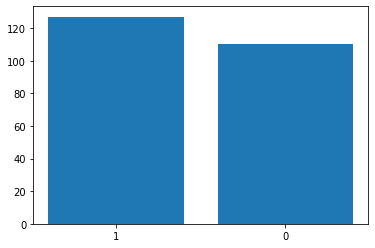

In [9]:
plt.bar(['1','0'], dados['Acima45'].value_counts()) #Gráfico para a proporção
#de pessoas acima de 45 anos

{'boxes': [<matplotlib.lines.Line2D at 0x7fa86ced6be0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa86cee5630>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa86ce720f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa86cee5d30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa86ced6ef0>,
  <matplotlib.lines.Line2D at 0x7fa86cee52b0>]}

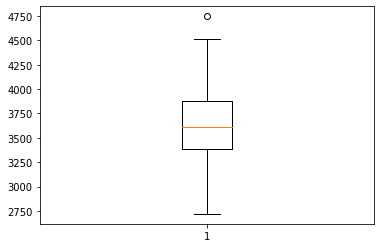

In [10]:
plt.boxplot(dados['Tamanho']) #Boxplot para o tamanho

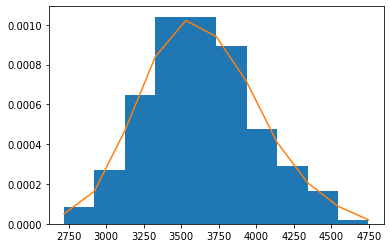

In [11]:
density = stats.gaussian_kde(dados['Tamanho'])
n, x, _ = plt.hist(dados['Tamanho'],  density=True)  
plt.plot(x, density(x))
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7fa86cf164a8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa86d58fb70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa86ce8acf8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa86f665eb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa86ceb64a8>,
  <matplotlib.lines.Line2D at 0x7fa86d5e2710>]}

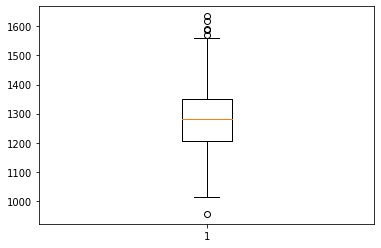

In [12]:
plt.boxplot(dados['Peso']) #Boxplot para o peso

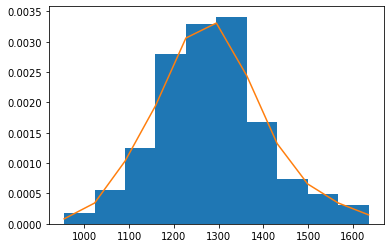

In [13]:
density = stats.gaussian_kde(dados['Peso'])
n, x, _ = plt.hist(dados['Peso'],  density=True)  
plt.plot(x, density(x))
plt.show()

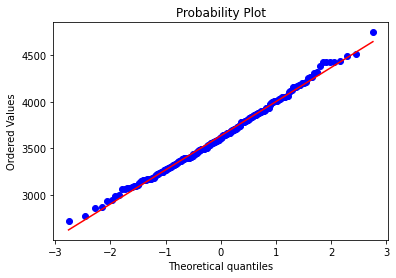

In [14]:
stats.probplot(dados['Tamanho'], dist = "norm", plot = plt) # Aula 5 - Parte 3
plt.show() #Verificar normalidade do tamanho

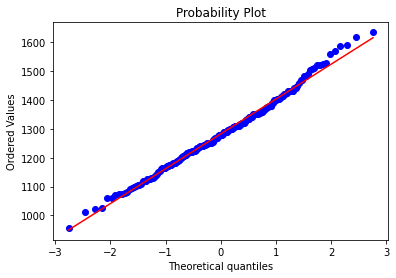

In [15]:
stats.probplot(dados['Peso'], dist = "norm", plot = plt) # Aula 5 - Parte 3
plt.show() #Verificar normalidade do peso

In [16]:
stats.shapiro(dados['Tamanho']) #Teste de shapiro para normalidade. Não rejeitou a hipótese de normalidade.

ShapiroResult(statistic=0.9943464398384094, pvalue=0.5202584862709045)

In [17]:
stats.normaltest(dados['Tamanho']) #Teste de normalidade D’Agostino and Pearson’s. Não rejeitou a hipótese de normalidade.

NormaltestResult(statistic=2.3624483324306653, pvalue=0.3069028084980585)

In [18]:
stats.shapiro(dados['Peso']) #Teste de shapiro para normalidade. Não rejeitou a hipótese de normalidade.

ShapiroResult(statistic=0.9929571151733398, pvalue=0.32308584451675415)

In [19]:
stats.normaltest(dados['Peso']) #Teste de normalidade D’Agostino and Pearson’s. Não rejeitou a hipótese de normalidade.

NormaltestResult(statistic=3.3902123270811764, pvalue=0.18357973851812406)

In [20]:
dados.groupby('Homem')['Peso'].describe().round(2) #Estatísticas por gênero

,count,mean,std,min,25%,50%,75%,max
Homem,,,,,,,,
0,103.0,1219.15,103.83,955.0,1146.00,1220.0,1290.0,1520.0
1,134.0,1331.86,108.93,1120.0,1252.75,1313.5,1400.0,1635.0


In [21]:
dados.groupby('Acima45')['Peso'].describe().round(2) #Estatísticas por faixa etária

,count,mean,std,min,25%,50%,75%,max
Acima45,,,,,,,,
0,110.0,1304.74,116.41,1027.0,1227.5,1301.0,1370.75,1635.0
1,127.0,1263.94,120.93,955.0,1180.0,1250.0,1332.50,1620.0


# Exercício 1 - Há diferença no peso cerebral entre os sexos? E entre os grupos etários?


In [22]:
H = dados[dados['Homem']==1]
M = dados[dados['Homem']==0] #Separação por sexo

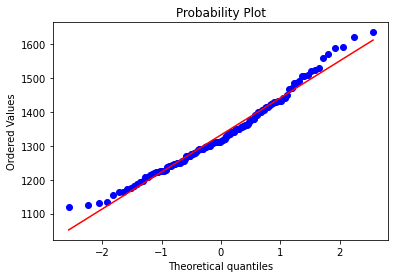

In [23]:
stats.probplot(H['Peso'], dist = "norm", plot = plt) # Aula 5 - Parte 3
plt.show() #Verificar normalidade do peso

In [24]:
stats.shapiro(H['Peso']) # Não rejeitou a hipótese de normalidade.

ShapiroResult(statistic=0.9780169129371643, pvalue=0.028754394501447678)

In [25]:
lilliefors(H['Peso'], pvalmethod = 'approx') # Não rejeitou a hipótese de normalidade.

(0.07319296053954616, 0.07533085755036728)

In [26]:
stats.anderson(H['Peso']) # Não rejeitou a hipótese de normalidade. Nível de significância entre 10% e 5%.

AndersonResult(statistic=0.7592588134145046, critical_values=array([0.56 , 0.638, 0.765, 0.893, 1.062]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

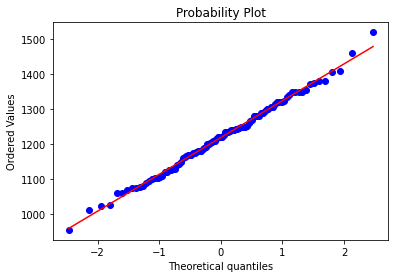

In [27]:
stats.probplot(M['Peso'], dist = "norm", plot = plt) # Aula 5 - Parte 3
plt.show() #Verificar normalidade do tamanho

In [28]:
stats.shapiro(M['Peso']) # Não rejeitou a hipótese de normalidade.

ShapiroResult(statistic=0.9959983825683594, pvalue=0.9919339418411255)

In [29]:
lilliefors(M['Peso'], pvalmethod = 'approx') # Não rejeitou a hipótese de normalidade.

(0.0457429492768302, 0.86928189955088)

In [30]:
stats.anderson(M['Peso']) # Não rejeitou a hipótese de normalidade. Com p-valor acima de 15%.

AndersonResult(statistic=0.14292747443232656, critical_values=array([0.556, 0.633, 0.759, 0.886, 1.054]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#### Temos que ambas as amostras possuem distribuição normal a um nível de significância de 5%

In [31]:
stats.levene(H['Peso'], M['Peso']) #Teste de igualdade de variância.
# Não rejeita a hipótese da variância das duas subpopulações serem iguais sob o nível de 5% de significância.

LeveneResult(statistic=0.08798545130505911, pvalue=0.767016022271913)

In [32]:
stats.ttest_ind(H['Peso'],M['Peso']) #Teste de comparação de médias (Aula 6 - Parte 1)
# Rejeita a hipótese das duas subpopulações terem médias iguais sob o nível de 5% de significância.

Ttest_indResult(statistic=8.05765147908099, pvalue=3.919241152559185e-14)

#### Sendo assim, como temos um valor-p menor que o nível de significância de 5%, então rejeitamos a hipótese nula,
#### ou seja, rejeitamos a hipótese de que as médias são iguais

### Separação em idade

In [33]:
H_2 = dados[dados['Acima45']==1]
M_2 = dados[dados['Acima45']==0] #Separação por faixa etária

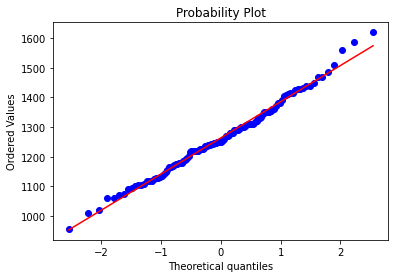

In [34]:
stats.probplot(H_2['Peso'], dist = "norm", plot = plt) # Aula 5 - Parte 3
plt.show() #Verificar normalidade do tamanho

In [35]:
stats.shapiro(H_2['Peso']) # Não rejeitou a hipótese de normalidade.

ShapiroResult(statistic=0.9917106032371521, pvalue=0.6554725170135498)

In [36]:
lilliefors(H_2['Peso'], pvalmethod = 'approx') # Não rejeitou a hipótese de normalidade.

(0.054175986782391106, 0.5395127162189802)

In [37]:
stats.anderson(H_2['Peso']) # Não rejeitou a hipótese de normalidade. Com p-valor acima de 15%.

AndersonResult(statistic=0.32573942729169403, critical_values=array([0.559, 0.637, 0.764, 0.891, 1.06 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

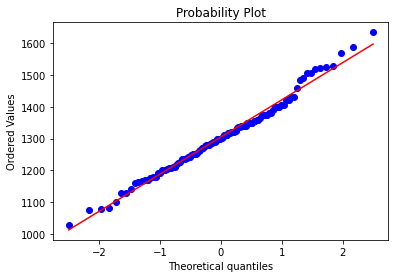

In [38]:
stats.probplot(M_2['Peso'], dist = "norm", plot = plt) # Aula 5 - Parte 3
plt.show() #Verificar normalidade do tamanho

In [39]:
stats.shapiro(M_2['Peso']) # Não rejeitou a hipótese de normalidade.

ShapiroResult(statistic=0.9877879619598389, pvalue=0.42216619849205017)

In [40]:
lilliefors(M_2['Peso'], pvalmethod = 'approx') # Não rejeitou a hipótese de normalidade.

(0.06000072085469621, 0.46075145513155163)

In [41]:
stats.anderson(M_2['Peso']) # Não rejeitou a hipótese de normalidade. Com p-valor acima de 15%.

AndersonResult(statistic=0.41369054165920716, critical_values=array([0.557, 0.634, 0.761, 0.888, 1.056]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [42]:
stats.levene(H_2['Peso'], M_2['Peso']) #Teste de igualdade de variância.
# Não rejeita a hipótese da variância das duas subpopulações serem iguais sob o nível de 5% de significância.

LeveneResult(statistic=0.1572368955265971, pvalue=0.6920731219043006)

In [43]:
stats.ttest_ind(H_2['Peso'], M_2['Peso']) #Teste de comparação de médias (Aula 6 - Parte 1)
# Rejeita a hipótese das duas subpopulações terem médias iguais sob o nível de 5% de significância.

Ttest_indResult(statistic=-2.6355362085897975, pvalue=0.008959602315452554)

# Exercício 2 - O tamanho da cabeça é preditor do peso cerebral e, neste caso, há diferença nessa relação entre os sexos e entre os grupos etários?


Para este exercício, é importante iniciar com uma análise descritiva.<br>
Assim, podemos avaliar se os coeficientes ajustados são coerentes com as representações gráficas.<br>

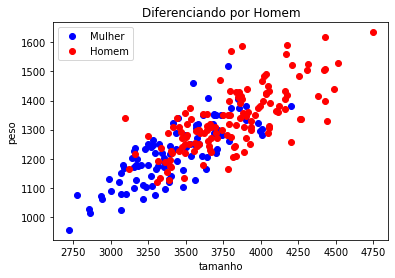

In [44]:
colors = itertools.cycle(["b", "r", "gray"])
groups = dados.groupby("Homem")
for name, group in groups:
    plt.plot(group["Tamanho"], group["Peso"], marker="o", linestyle="", label=name, color=next(colors))
plt.legend(labels = ("Mulher", "Homem"))
plt.xlabel("tamanho")
plt.ylabel("peso")
plt.title("Diferenciando por Homem")
plt.show()

Do gráfico acima, já temos uma intuição do comportamento conjunto das variáveis peso e tamanho cerebral entre homens e mulheres.

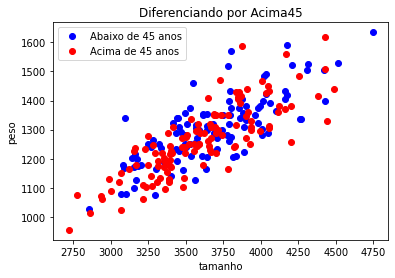

In [45]:
colors = itertools.cycle(["b", "r", "gray"])
groups = dados.groupby("Acima45")
for name, group in groups:
    plt.plot(group["Tamanho"], group["Peso"], marker="o", linestyle="", label=name, color=next(colors))
plt.legend(labels = ("Abaixo de 45 anos", "Acima de 45 anos"))
plt.xlabel("tamanho")
plt.ylabel("peso")
plt.title("Diferenciando por Acima45")
plt.show()

Do gráfico acima, já temos uma intuição do comportamento conjunto das variáveis peso e tamanho cerebral entre pessoas abaixo e acima de 45 anos.

Em seguida, vamos ajustar um modelo linear como forma de responder se o peso cerebral pode ser predito com o auxílio das variáveis tamanho cerebral, sexo e idade. 

In [46]:
# Aulas 6 e 7
# Este é o modelo completo, com todas as interações
modelo = ols('Peso ~ Tamanho * Acima45 * Homem', data = dados)
res = modelo.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     63.68
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           2.90e-50
Time:                        00:24:50   Log-Likelihood:                -1343.0
No. Observations:                 237   AIC:                             2702.
Df Residuals:                     229   BIC:                             2730.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               399.89

In [47]:
modelo = ols('Peso ~ Tamanho * Acima45 * Homem - Tamanho:Acima45:Homem', data = dados)
res = modelo.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     74.60
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           3.24e-51
Time:                        00:24:50   Log-Likelihood:                -1343.1
No. Observations:                 237   AIC:                             2700.
Df Residuals:                     230   BIC:                             2724.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         408.7992    102.157     

In [48]:
modelo = ols('Peso ~ Tamanho * Acima45 * Homem - Tamanho:Acima45:Homem - Tamanho:Homem', data = dados)
res = modelo.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     88.96
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           7.24e-52
Time:                        00:24:50   Log-Likelihood:                -1343.9
No. Observations:                 237   AIC:                             2700.
Df Residuals:                     231   BIC:                             2721.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         493.1839     77.814     

In [49]:
modelo = ols('Peso ~ Tamanho * Acima45 * Homem - Tamanho:Acima45:Homem - Tamanho:Homem - Acima45:Homem', data = dados)
res = modelo.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     110.0
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           2.05e-52
Time:                        00:24:50   Log-Likelihood:                -1345.1
No. Observations:                 237   AIC:                             2700.
Df Residuals:                     232   BIC:                             2717.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         453.0924     73.463     

Reduzindo as interações (excluindo de uma a uma, chegamos no modelo final)

In [50]:
modelo = ols('Peso ~ Tamanho +  Acima45 + Homem', data = dados)
res = modelo.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     146.0
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           2.94e-53
Time:                        00:24:50   Log-Likelihood:                -1345.7
No. Observations:                 237   AIC:                             2699.
Df Residuals:                     233   BIC:                             2713.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    395.5079     52.999      7.463      0.0

Fazendo as análises de resíduos

In [51]:
# Aulas 6 e 7

# valores preditos de E(Y)
ypred=res.fittedvalues

# objeto para a análise de pontos influentes
infl = res.get_influence()

# diagonal da matriz hat
hii = infl.hat_matrix_diag

# resíduo studentizado (internamente)
res_stud = infl.resid_studentized_internal

# resíduo studentizado com i-ésima observação deletada (externamente)
res_stud_del = infl.resid_studentized_external

# DFFITS
(dffits,k) = infl.dffits

# Distância de Cook
(cook,p) = infl.cooks_distance

Int64Index([], dtype='int64') Int64Index([43, 102], dtype='int64')


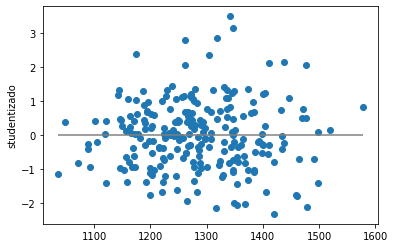

In [52]:
plt.scatter(ypred, res_stud)
plt.ylabel('studentizado')
plt.hlines(0,xmin=min(ypred),xmax=max(ypred),color='gray')
print(dados.index[res_stud<-3],dados.index[res_stud>3]) # identifica as observações mais críticas

Int64Index([], dtype='int64')


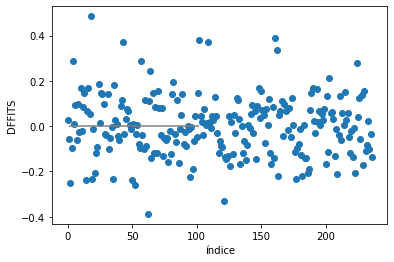

In [53]:
plt.scatter(dados.index, dffits)
plt.ylabel('DFFITS')
plt.hlines(0,xmin=1,xmax=102,color='gray')
plt.xlabel('índice')
print(dados.index[dffits>1]) # valores que estão acima de 1

Int64Index([], dtype='int64')


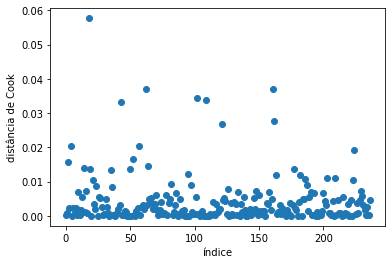

In [54]:
plt.scatter(dados.index, cook)
plt.ylabel('distância de Cook')
plt.xlabel('índice')
print(dados.index[cook>f.ppf(.5, 4, 233)]) # valores que estão acima do percentil 50 de uma distribuição F(p,n-p)

Int64Index([18, 24, 47, 122, 227], dtype='int64')


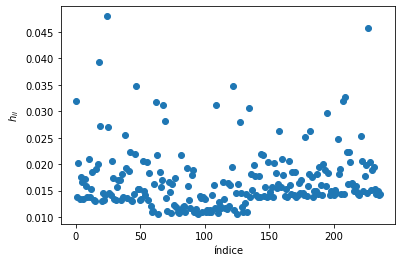

In [55]:
plt.scatter(dados.index, hii)
plt.ylabel('$h_{ii}$')
plt.xlabel('índice')
print(dados.index[hii>.034])   # h_ii>2p/n (neste caso, .034)

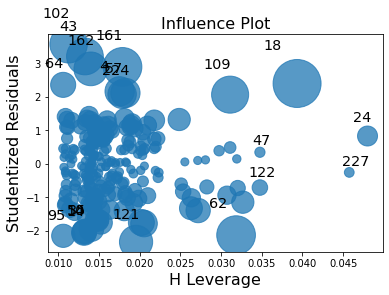

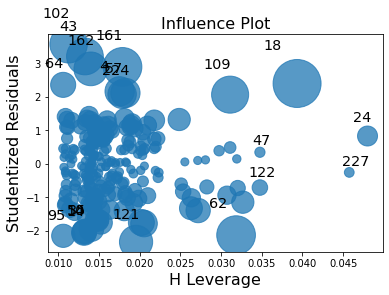

In [56]:
# Gráficos dos resíduos
sm.graphics.influence_plot(res)

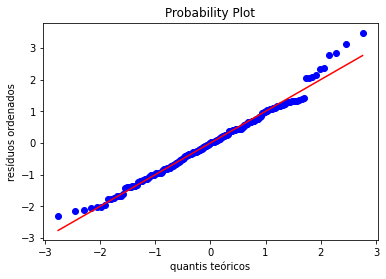

In [57]:
# Verificando a suposição de distribuição Normal dos resíduos (Aula 6 - Parte 2)
stats.probplot(res_stud, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('resíduos ordenados')
plt.show()

Tem algumas observações com resíduos moderadamente altos (tanto o studentizado quanto o $h_{ii}$). Mas são poucas, com valores não longe demais dos esperados e nem são as mesmas. Não inspiram preocupação. Também temos um pouco de desvio da normalidade, mas aparentemente nada crítico, mais nas caudas da distribuição.

In [58]:
stats.shapiro(res_stud) # Não rejeitou a hipótese de normalidade sob nível de significância de 1%.
# Porém, sob nível de significância de 5%, seria rejeitada a normalidade.
# Cabe ao estatístico avaliar se a violação da hipótese de normalidade dos resíduos esteja a ponto de invalidar o ajuste,
# ou se ainda motivar a procura de uma transformação da variável resposta como forma de melhorar o ajuste.

ShapiroResult(statistic=0.9861410856246948, pvalue=0.0211861003190279)

In [59]:
variables = res.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

[130.72596546224784,
 1.4029751956521952,
 1.0404193672560635,
 1.3983710653327666]

O VIF não identificou maiores problemas de multicolinearidade. Temos um erro padrão mais elevado nos coeficientes das variáveis categorizadas, o que é esperado.
O VIF do intercepto possivelmente se reduzirá quando centralizarmos a variável Tamanho e deixarmos o intercepto interpretável.

In [60]:
Tamanho_c = dados.Tamanho-np.mean(dados.Tamanho)

modelo = ols('Peso ~ Tamanho_c +  Acima45 + Homem', data = dados)
res = modelo.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     146.0
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           2.94e-53
Time:                        00:24:52   Log-Likelihood:                -1345.7
No. Observations:                 237   AIC:                             2699.
Df Residuals:                     233   BIC:                             2713.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1282.9713      8.703    147.412      0.0

In [61]:
variables = res.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 

[3.5253225566754294, 1.4029751956521952, 1.0404193672560633, 1.398371065332766]

<h2>Interpretação do modelo final:</h2>
- O peso médio do cérebro de homens com mais de 45 anos e tamanho da cabeça igual a 3634 é de 1283. 
- O aumento de 1 unidade no tamanho do cérebro gera um aumento de 0,24 no peso médio cerebral. Ou melhor, o aumento de 10 unidades no tamanho gera um aumento no peso médio de 2,4.
- Homens têm um peso médio cerebral 22,5 unidades a mais do que mulheres, quando fixado o tamanho da cabeça. 
- Pessoas acima de 45 anos têm peso médio cerebral de 24 unidades a menos do que pessoas com menos de 45 anos.<br>

  Repare que as diferenças detectadas pelo teste t de Student não levam em consideração a diferença no tamanho da cabeça. E detectaram diferenças de 100 unidades de peso entre homens e mulheres e de 40 unidades de peso entre mais e menos de 45 anos, aproximadamente. Essas diferenças diminuem no modelo de regressão, pois estamos "corrigindo" esses valores levando em consideração a diferença nos tamanhos das cabeças.

# Exercício 3 - Estime o peso médio do cérebro de homens e de mulheres (pontual e intervalar).

- O EMV é dado pela média amostral. Como não conhecemos a variância populacional, então utilizamos a variância amostral. Portanto, o quantil a ser utilizado deve ser da distribuição t-student.

- Note que o tamanho amostral é grande, portanto o número de graus de liberdade é alto e a distribuição se aproxima de uma normal.

## Estimação pontual do peso médio do cérebro dos homens

In [62]:
EMV_H_Peso = H['Peso'].mean()
EMV_H_Peso

1331.858208955224

## IC para o peso do cérebro dos homens

In [63]:
[EMV_H_Peso - stats.t.ppf(0.975, len(H)-1) * (np.std(H['Peso'])) / len(H), # Aula 4 - Parte 2
EMV_H_Peso + stats.t.ppf(0.975, len(H)-1) * (np.std(H['Peso'])) / len(H)]

[1330.2562646050394, 1333.4601533054085]

## Estimação pontual do peso médio do cérebro das mulheres

In [64]:
EMV_M_Peso = M['Peso'].mean()
EMV_M_Peso

1219.1456310679612

## IC para o peso do cérebro das mulheres

In [65]:
[EMV_M_Peso - stats.t.ppf(0.975, len(M)-1) * (np.std(H['Peso'])) / len(H), # Aula 4 - Parte 2
EMV_M_Peso + stats.t.ppf(0.975, len(M)-1) * (np.std(H['Peso'])) / len(H)]

[1217.5392047538792, 1220.7520573820432]